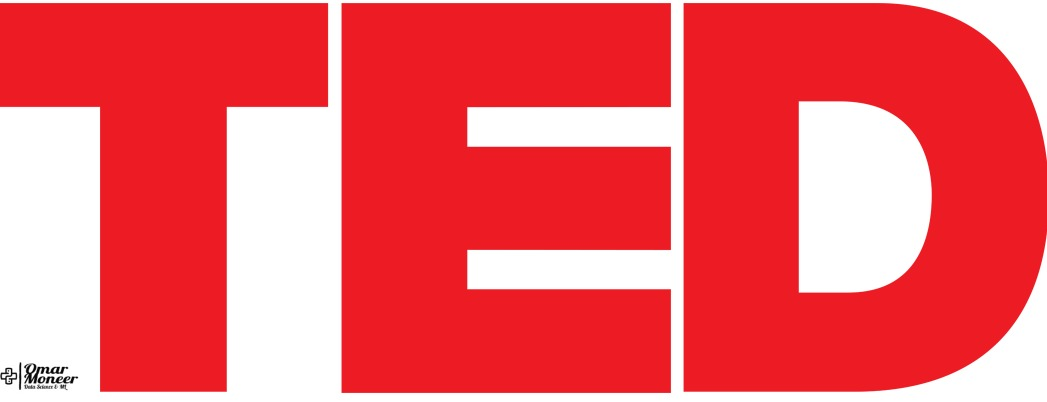

## Importing the important libraries that we will use in this analysis process

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.offline as pyoff
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
from chart_studio import plotly
import plotly.express as px
%matplotlib inline

## Reading the used data in the analysis and knowing the structure of the data

In [2]:
tedk = pd.read_csv('ted-kaggle.csv')
tedk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
title     5440 non-null object
author    5439 non-null object
date      5440 non-null object
views     5440 non-null int64
likes     5440 non-null int64
link      5440 non-null object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [3]:
tedk.nunique()

title     5440
author    4443
date       200
views      973
likes      753
link      5440
dtype: int64

In [4]:
tedk.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


## Dropping any missing data

In [5]:
tedk.dropna(inplace=True)
tedk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5439
Data columns (total 6 columns):
title     5439 non-null object
author    5439 non-null object
date      5439 non-null object
views     5439 non-null int64
likes     5439 non-null int64
link      5439 non-null object
dtypes: int64(2), object(4)
memory usage: 297.4+ KB


### Splitting the month from the year in the [date] column

In [6]:
month = []
year = []

for date in tedk['date']:
    month.append(date.split()[0])
    year.append(date.split()[1])
tedk['month'] = month
tedk['year'] = year

### 1st finding: Knowing the most popular talk 

In [7]:
tedk.sort_values(by='views',ascending=False).head()
#another way yo get the same output : tedk[tedk['views']==tedk['views'].max()]

,title,author,date,views,likes,link,month,year
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,February,2006
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...,June,2012
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...,February,2016
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...,September,2009
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...,June,2010


### 2nd finding: Find the ratio of likes to views to know the ratio of people that liked the talk after the view and how the CTA method affect the speople 

In [8]:
tedk['reach'] = (tedk['likes']/tedk['views']) *100

In [9]:
tedk.sort_values(by='reach',ascending=False)
tedk.head()

,title,author,date,views,likes,link,month,year,reach
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021,2.970297
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022,2.990654
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021,2.912621
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021,2.810304
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021,3.000000


### We can find the change in the views, number of the talks, and the year 
#### We will find that 2015 is the year with the biggest number of views

In [10]:
ted_date = tedk[['author','year','views']]
ted_date.count()
td =pd.pivot_table(ted_date,values=['author','views'],columns=['year'],aggfunc={'author':len,'views':np.sum})
td

year,1970,1972,1983,1984,1990,1991,1994,1998,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
author,2,1,1,1,1,1,1,6,5,26,...,388,357,376,399,495,473,544,501,390,20
views,252000,1300000,690000,1100000,723000,327000,699000,7410000,10530000,30442000,...,1062537497,824652297,1154739598,928894896,998891600,811857597,948119299,635944200,429728700,11470000


## Knowing the number of the talks of each author

### 3rd finding: the authors that made more than 10 talks

In [11]:
tedk['author'].value_counts().head(8)

Alex Gendler        45
Iseult Gillespie    33
Matt Walker         18
Alex Rosenthal      15
Elizabeth Cox       13
Emma Bryce          12
Juan Enriquez       11
Daniel Finkel       11
Name: author, dtype: int64

## Make the data only have the numeric data to make mathematical operations on it 

In [12]:
talk_count=tedk['author'].value_counts()
talk_count.to_csv(r'F:\Data Science\Ted talks\export_dataframe.csv')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [13]:
talks_count=pd.read_csv('talks_count.csv')

### 4th finding: The total views and likes

In [26]:
tot = tedk.groupby(by='author')[['views','likes']].sum().sort_values(by='likes',ascending=False)
tot['reach']=(tot['likes']/tot['views'])*100
tot['likes_million']=tot['likes']/1000000
tot['views_million']=tot['views']/1000000
tot.drop(labels=['views','likes'],axis=1,inplace=True)
total= tot.merge(talks_count,on='author')
total

,author,reach,likes_million,views_million,count
0,Alex Gendler,3.040129,5.691000,187.1960,45
1,Sir Ken Robinson,2.962343,2.833600,95.6540,5
2,Bill Gates,3.019280,2.349000,77.8000,8
3,Simon Sinek,3.002674,2.246000,74.8000,3
4,Brené Brown,3.061111,2.204000,72.0000,2
...,...,...,...,...,...
4438,Peggy Chan,3.095238,0.000065,0.0021,1
4439,Dave Matthews,3.062500,0.000049,0.0016,1
4440,Qi Wu 吴琪,3.133333,0.000047,0.0015,1
4441,Deutsche Philharmonie Merck,3.076923,0.000040,0.0013,1


In [37]:
fig = px.pie(total.head(10), values='count', names='author', title='The contribution of each author in spreading ideas')
fig.show()

### 5th finding: The average of the views of each author and the biggest 10 authors of number of the views per one talk

In [15]:
total['avg_views_for_author']=total['views_million']/total['count']
total.sort_values(by=['avg_views_for_author'],ascending=False).head(10)

,author,reach,likes_million,views_million,count,avg_views_for_author
5,Amy Cuddy,2.968750,1.900,64.0,1,64.0
7,Tim Urban,3.000000,1.800,60.0,1,60.0
10,Sam Berns,3.023256,1.300,43.0,1,43.0
11,Robert Waldinger,2.926829,1.200,41.0,1,41.0
14,Cameron Russell,2.894737,1.100,38.0,1,38.0
16,Graham Shaw,2.972973,1.100,37.0,1,37.0
15,Mary Roach,2.972973,1.100,37.0,1,37.0
4,Brené Brown,3.061111,2.204,72.0,2,36.0
19,Tom Thum,2.941176,1.000,34.0,1,34.0
26,Apollo Robbins,3.009677,0.933,31.0,1,31.0


### 6th Finding: The trend of the total views along the talks of the most frequent author alnog his/her whole number of talks 
#### Alex Gendler

In [16]:
Alex_G=tedk[tedk['author']=='Alex Gendler']

In [17]:
tedk_ser = go.Scatter(x=Alex_G['date'],
                         y=Alex_G['views'].values)

In [18]:
layout = go.Layout(title='views', xaxis=dict(title='date'),
                   yaxis=dict(title='views'))

In [19]:
fig = go.Figure(data=[tedk_ser], layout=layout)
pyoff.iplot(fig)

### 7th finding: The most watched talk of the most frequent author 

In [20]:
Alex_G[Alex_G['views']==Alex_G['views'].max()]

,title,author,date,views,likes,link,month,year,reach
3107,Can you solve the prisoner hat riddle?,Alex Gendler,October 2015,24000000,723000,https://ted.com/talks/alex_gendler_can_you_sol...,October,2015,3.0125


In [21]:
fig = px.line(Alex_G, x='views', y=Alex_G.title)
fig.show()

In [22]:
tedk['year']=tedk['year'].astype('int64')
tedk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5439
Data columns (total 9 columns):
title     5439 non-null object
author    5439 non-null object
date      5439 non-null object
views     5439 non-null int64
likes     5439 non-null int64
link      5439 non-null object
month     5439 non-null object
year      5439 non-null int64
reach     5439 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 424.9+ KB


In [23]:
yr_talks=tedk.groupby(by='year')['author'].value_counts()
yr_talks=yr_talks.to_frame()

### 8th finding: The most author comes to ted platform within one year

In [24]:
yr_talks[yr_talks['author']==yr_talks['author'].max()]

,,author
year,author,
2019,Iseult Gillespie,13


### 9th Finding: Finding the author and the talk title with biggest number of views ever 

In [48]:
tedk["author's talk"]=tedk['author'] +"-"+ tedk['title']

In [49]:
tedk

,title,author,date,views,likes,link,month,year,reach,author+talk,author's talk
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021,2.970297,Ozawa Bineshi Albert-Climate action needs new ...,Ozawa Bineshi Albert-Climate action needs new ...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022,2.990654,Sydney Iaukea-The dark history of the overthro...,Sydney Iaukea-The dark history of the overthro...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021,2.912621,Martin Reeves-How play can spark new ideas for...,Martin Reeves-How play can spark new ideas for...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021,2.810304,James K. Thornton-Why is China appointing judg...,James K. Thornton-Why is China appointing judg...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021,3.000000,Mahendra Singhi-Cement's carbon problem — and ...,Mahendra Singhi-Cement's carbon problem — and ...
...,...,...,...,...,...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...,February,2006,3.053333,Hans Rosling-The best stats you've ever seen,Hans Rosling-The best stats you've ever seen
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,February,2006,2.916667,Sir Ken Robinson-Do schools kill creativity?,Sir Ken Robinson-Do schools kill creativity?
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...,February,2006,3.034483,Majora Carter-Greening the ghetto,Majora Carter-Greening the ghetto
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...,February,2006,3.000000,David Pogue-Simplicity sells,David Pogue-Simplicity sells


In [50]:
fig = px.scatter(tedk, x=tedk["author's talk"], y='views')
fig.show()